# Task
Create a Rock-Paper-Scissors game using computer vision. The game should use a webcam to capture the user's hand gestures (rock, paper, or scissors) and an AI model (TensorFlow CNN) to classify the gesture. The game should then compare the user's gesture with a random computer choice and determine the winner. The game should display the webcam feed, the predicted gesture, the computer's choice, and the score.

## Setup and imports

### Subtask:
Import necessary libraries (OpenCV, TensorFlow, etc.).


**Reasoning**:
Import the necessary libraries for building the Rock-Paper-Scissors game, including OpenCV for webcam access, TensorFlow for the CNN model, NumPy for numerical operations, random for the computer's choice, and specific modules from TensorFlow Keras for model building.



In [1]:
import cv2
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Data collection

### Subtask:
Collect images of rock, paper, and scissors gestures using the webcam. This could involve capturing images for each gesture from different angles and lighting conditions.


**Reasoning**:
Initialize video capture, create directories, and set up the loop to capture images for each gesture based on key presses, saving them to their respective directories with unique filenames. This addresses steps 1 through 8 of the instructions.



In [2]:
import os
import time

# Initialize video capture
cap = cv2.VideoCapture(0)

# Create directories
gestures = ['rock', 'paper', 'scissors']
for gesture in gestures:
    if not os.path.exists(gesture):
        os.makedirs(gesture)

# Counters for each gesture
counters = {gesture: 0 for gesture in gestures}

print("Press 'r' for rock, 'p' for paper, 's' for scissors, and 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Display the frame
    cv2.imshow('Capture Gestures', frame)

    # Check for key presses
    key = cv2.waitKey(1) & 0xFF

    if key == ord('r'):
        filename = os.path.join('rock', f'rock_{int(time.time())}_{counters["rock"]}.png')
        cv2.imwrite(filename, frame)
        counters['rock'] += 1
        print(f'Saved rock image: {filename}')
    elif key == ord('p'):
        filename = os.path.join('paper', f'paper_{int(time.time())}_{counters["paper"]}.png')
        cv2.imwrite(filename, frame)
        counters['paper'] += 1
        print(f'Saved paper image: {filename}')
    elif key == ord('s'):
        filename = os.path.join('scissors', f'scissors_{int(time.time())}_{counters["scissors"]}.png')
        cv2.imwrite(filename, frame)
        counters['scissors'] += 1
        print(f'Saved scissors image: {filename}')
    elif key == ord('q'):
        break

# Release the video capture object and close all windows (Step 9)
cap.release()
cv2.destroyAllWindows()

print("Data collection finished.")

Press 'r' for rock, 'p' for paper, 's' for scissors, and 'q' to quit.


error: OpenCV(4.12.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


## Data collection

### Subtask:
Collect images of rock, paper, and scissors gestures using the webcam. This could involve capturing images for each gesture from different angles and lighting conditions.


**Reasoning**:
Modify the data collection code to remove window display and use a non-interactive approach for capturing images for each gesture, then save the images and release the capture object.



In [3]:
import os
import time

# Initialize video capture
cap = cv2.VideoCapture(0)

# Create directories
gestures = ['rock', 'paper', 'scissors']
for gesture in gestures:
    if not os.path.exists(gesture):
        os.makedirs(gesture)

# Counters for each gesture
counters = {gesture: 0 for gesture in gestures}
num_images_per_gesture = 50 # Define the number of images to collect for each gesture

print(f"Starting image collection. Will collect {num_images_per_gesture} images for each gesture.")

# Collect images for each gesture
for gesture in gestures:
    print(f"Collecting images for '{gesture}'...")
    # Give a short delay before starting collection for each gesture
    time.sleep(2)
    while counters[gesture] < num_images_per_gesture:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame from webcam.")
            break

        filename = os.path.join(gesture, f'{gesture}_{int(time.time())}_{counters[gesture]}.png')
        cv2.imwrite(filename, frame)
        counters[gesture] += 1
        # Add a small delay between captures to avoid capturing too quickly
        time.sleep(0.1)
        print(f'Saved {gesture} image: {filename}')

    print(f"Finished collecting {counters[gesture]} images for '{gesture}'.")


# Release the video capture object
cap.release()

print("Data collection finished.")

Starting image collection. Will collect 50 images for each gesture.
Error: Could not read frame from webcam.
Finished collecting 0 images for 'rock'.
Error: Could not read frame from webcam.
Finished collecting 0 images for 'paper'.
Error: Could not read frame from webcam.
Finished collecting 0 images for 'scissors'.
Data collection finished.


**Reasoning**:
The previous attempt to capture images failed because the webcam could not be accessed. This might be due to the camera index (0) being incorrect or the camera not being available. I will try a different camera index to see if that resolves the issue.



In [4]:
import os
import time

# Initialize video capture with a different index (e.g., 1)
cap = cv2.VideoCapture(1)

# Create directories
gestures = ['rock', 'paper', 'scissors']
for gesture in gestures:
    if not os.path.exists(gesture):
        os.makedirs(gesture)

# Counters for each gesture
counters = {gesture: 0 for gesture in gestures}
num_images_per_gesture = 50 # Define the number of images to collect for each gesture

print(f"Starting image collection. Will collect {num_images_per_gesture} images for each gesture.")

# Collect images for each gesture
for gesture in gestures:
    print(f"Collecting images for '{gesture}'...")
    # Give a short delay before starting collection for each gesture
    time.sleep(2)
    while counters[gesture] < num_images_per_gesture:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame from webcam.")
            break

        filename = os.path.join(gesture, f'{gesture}_{int(time.time())}_{counters[gesture]}.png')
        cv2.imwrite(filename, frame)
        counters[gesture] += 1
        # Add a small delay between captures to avoid capturing too quickly
        time.sleep(0.1)
        print(f'Saved {gesture} image: {filename}')

    print(f"Finished collecting {counters[gesture]} images for '{gesture}'.")


# Release the video capture object
cap.release()

print("Data collection finished.")

Starting image collection. Will collect 50 images for each gesture.
Error: Could not read frame from webcam.
Finished collecting 0 images for 'rock'.
Error: Could not read frame from webcam.
Finished collecting 0 images for 'paper'.
Error: Could not read frame from webcam.
Finished collecting 0 images for 'scissors'.
Data collection finished.


## Data preprocessing

### Subtask:
Preprocess the collected images (e.g., resizing, normalization, data augmentation) to prepare them for training the CNN model.


**Reasoning**:
Define image dimensions, gestures, and initialize empty lists for image data and labels.



In [5]:
# Define image dimensions and gestures
img_width, img_height = 128, 128
gestures = ['rock', 'paper', 'scissors']
num_classes = len(gestures)

# Create empty lists to store image data and labels
image_data = []
labels = []

print(f"Image dimensions set to: {img_width}x{img_height}")
print(f"Gestures: {gestures}")

Image dimensions set to: 128x128
Gestures: ['rock', 'paper', 'scissors']


**Reasoning**:
Iterate through gesture directories, read and resize images, and append data and labels to lists.



In [6]:
import os

# Iterate through each gesture directory
for i, gesture in enumerate(gestures):
    gesture_dir = os.path.join(os.getcwd(), gesture)
    print(f"Processing images in directory: {gesture_dir}")

    # Check if the directory exists
    if not os.path.exists(gesture_dir):
        print(f"Directory not found: {gesture_dir}. Skipping.")
        continue

    # Iterate through all the image files in the directory
    for filename in os.listdir(gesture_dir):
        if filename.endswith(".png"): # Assuming images are in PNG format
            img_path = os.path.join(gesture_dir, filename)

            # Read the image
            img = cv2.imread(img_path)

            if img is None:
                print(f"Warning: Could not read image: {img_path}. Skipping.")
                continue

            # Resize the image
            resized_img = cv2.resize(img, (img_width, img_height))

            # Append the resized image (as a NumPy array) to the image data list
            image_data.append(resized_img)

            # Append the corresponding gesture label (as an integer) to the labels list
            labels.append(i) # Use the index as the integer label

print("Finished processing images.")

Processing images in directory: /content/rock
Processing images in directory: /content/paper
Processing images in directory: /content/scissors
Finished processing images.


**Reasoning**:
Convert the lists to NumPy arrays, normalize the image data, and convert labels to categorical format.



In [7]:
# Convert the image data and labels lists into NumPy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Normalize the image data by dividing by 255.0
image_data = image_data / 255.0

# Convert the labels to a categorical format
labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

Image data shape: (0,)
Labels shape: (0, 3)


## Model building

### Subtask:
Design and build a Convolutional Neural Network (CNN) model using TensorFlow for image classification.


**Reasoning**:
Design and build the CNN model architecture using the Sequential API, adding convolutional, pooling, flatten, and dense layers as specified in the instructions. Compile the model and print its summary.



In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

### Subtask:
Train the CNN model on the preprocessed image data.


**Reasoning**:
Train the compiled CNN model using the preprocessed image data and labels.



In [9]:
history = model.fit(image_data, labels, epochs=10, batch_size=32)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (None, 128, 128, 3), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=True
  • mask=None

## Model training retry 1

### Subtask:
Train the CNN model on the preprocessed image data. This is a retry of the previous training step, acknowledging that the lack of data caused the failure.


**Reasoning**:
Generate synthetic image data and labels since the previous data loading failed, then train the model with this synthetic data.



In [10]:
# Step 1: Generate synthetic image data and labels
number_of_samples = 100
image_data = np.random.rand(number_of_samples, img_height, img_width, 3).astype(np.float32)
# Generate random integer labels between 0 and num_classes-1
integer_labels = np.random.randint(0, num_classes, size=number_of_samples)
# Convert integer labels to one-hot encoded labels
labels = tf.keras.utils.to_categorical(integer_labels, num_classes=num_classes)

print("Generated synthetic image data shape:", image_data.shape)
print("Generated synthetic labels shape:", labels.shape)

# Step 2 & 3: Train the model and store history
history = model.fit(image_data, labels, epochs=10, batch_size=32)

Generated synthetic image data shape: (100, 128, 128, 3)
Generated synthetic labels shape: (100, 3)
Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

**Reasoning**:
The training failed because the model was already compiled in a previous step, and compiling it again within the same TensorFlow graph context is causing issues. Re-create the model definition and compilation in this step before training with the synthetic data.



In [11]:
# Step 1: Generate synthetic image data and labels (already done in the previous attempt, keeping the same generation logic)
number_of_samples = 100
image_data = np.random.rand(number_of_samples, img_height, img_width, 3).astype(np.float32)
integer_labels = np.random.randint(0, num_classes, size=number_of_samples)
labels = tf.keras.utils.to_categorical(integer_labels, num_classes=num_classes)

print("Generated synthetic image data shape:", image_data.shape)
print("Generated synthetic labels shape:", labels.shape)

# Re-define and compile the model to avoid the ValueError
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Step 2 & 3: Train the model and store history
history = model.fit(image_data, labels, epochs=10, batch_size=32)

Generated synthetic image data shape: (100, 128, 128, 3)
Generated synthetic labels shape: (100, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 611ms/step - accuracy: 0.2750 - loss: 6.0063
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 717ms/step - accuracy: 0.3426 - loss: 2.3125
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 487ms/step - accuracy: 0.4448 - loss: 1.0907
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 499ms/step - accuracy: 0.4468 - loss: 1.0685
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 494ms/step - accuracy: 0.3245 - loss: 1.0621
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 742ms/step - accuracy: 0.4458 - loss: 1.0037
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 487ms/step - accuracy: 0.6047 - loss: 1.0331
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 494ms/step - accuracy: 0.9412 - loss: 1.0250
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 509ms/step - accuracy: 0.5524 - loss: 0.9736
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 741ms/step - accuracy: 0.6670 - loss: 0.9127


## Model evaluation

### Subtask:
Evaluate the trained model's performance on a separate test set.


**Reasoning**:
Generate a synthetic test dataset and evaluate the trained model on it.



In [12]:
# Step 1: Prepare a synthetic test dataset
number_of_test_samples = 20
test_image_data = np.random.rand(number_of_test_samples, img_height, img_width, 3).astype(np.float32)
test_integer_labels = np.random.randint(0, num_classes, size=number_of_test_samples)
test_labels = tf.keras.utils.to_categorical(test_integer_labels, num_classes=num_classes)

print("Generated synthetic test image data shape:", test_image_data.shape)
print("Generated synthetic test labels shape:", test_labels.shape)

# Step 2 & 3: Evaluate the trained model on the synthetic test dataset and print the results
print("\nEvaluating model on synthetic test data...")
loss, accuracy = model.evaluate(test_image_data, test_labels, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Generated synthetic test image data shape: (20, 128, 128, 3)
Generated synthetic test labels shape: (20, 3)

Evaluating model on synthetic test data...
Test Loss: 1.1916
Test Accuracy: 0.4000


## Real-time prediction

### Subtask:
Use the trained model to predict the gesture from real-time webcam feed.


**Reasoning**:
Initialize the video capture object and start a loop to read frames from the webcam. Inside the loop, preprocess the frame, make a prediction using the trained model, get the predicted label, display the prediction on the frame, and show the frame. Also, include a check for a key press to exit the loop and ensure the video capture object is released and windows are closed after the loop.



In [13]:
# Initialize video capture
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open webcam.")
    # Use finish_task to indicate failure if webcam cannot be opened
    # This will be handled by the next step, but for clarity in this step's output
    # we print an error message.
    # The actual finish_task will be in the next step's reasoning if the loop doesn't start.
else:
    print("Webcam opened successfully.")
    # Define the gesture labels
    gesture_labels = ['rock', 'paper', 'scissors']

    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()

        # If frame is not read correctly, break the loop
        if not ret:
            print("Error: Could not read frame.")
            break

        # Preprocess the captured frame
        # Resize to the expected dimensions
        resized_frame = cv2.resize(frame, (img_width, img_height))
        # Normalize the frame
        normalized_frame = resized_frame / 255.0
        # Expand dimensions to match model input shape (batch size of 1)
        input_frame = np.expand_dims(normalized_frame, axis=0)

        # Use the trained model to make a prediction
        predictions = model.predict(input_frame)

        # Get the predicted gesture label
        predicted_class_index = np.argmax(predictions)
        predicted_gesture = gesture_labels[predicted_class_index]

        # Display the predicted gesture on the frame
        cv2.putText(frame, f'Prediction: {predicted_gesture}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Display the frame with the prediction
        cv2.imshow('Rock Paper Scissors', frame)

        # Check for a key press (e.g., 'q') to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object
    cap.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()

    print("Webcam feed closed.")

Error: Could not open webcam.


## Real-time prediction retry 1

### Subtask:
Use the trained model to predict the gesture from real-time webcam feed. This is a retry of the previous real-time prediction step, acknowledging that the webcam could not be opened.


## Game logic

### Subtask:
Implement the game logic for Rock-Paper-Scissors, comparing the user's predicted gesture with the computer's random choice.


**Reasoning**:
Define a function to determine the winner of a Rock-Paper-Scissors game based on the user's predicted gesture and the computer's random choice, and return the outcome as a string.



In [14]:
def determine_winner(user_gesture, computer_choice):
    """
    Determines the winner of a Rock-Paper-Scissors game.

    Args:
        user_gesture: The user's predicted gesture ('rock', 'paper', or 'scissors').
        computer_choice: The computer's random choice ('rock', 'paper', or 'scissors').

    Returns:
        A string indicating the outcome ('User Wins!', 'Computer Wins!', or 'Tie!').
    """
    if user_gesture == computer_choice:
        return "Tie!"
    elif (user_gesture == 'rock' and computer_choice == 'scissors') or \
         (user_gesture == 'paper' and computer_choice == 'rock') or \
         (user_gesture == 'scissors' and computer_choice == 'paper'):
        return "User Wins!"
    else:
        return "Computer Wins!"

# Example usage (for testing the function)
# user_prediction = random.choice(['rock', 'paper', 'scissors']) # Use random for simulation
# computer_selection = random.choice(['rock', 'paper', 'scissors']) # Use random for simulation
# result = determine_winner(user_prediction, computer_selection)
# print(f"User chose: {user_prediction}, Computer chose: {computer_selection}, Result: {result}")

## User interface

### Subtask:
Create a simple user interface to display the webcam feed, predictions, scores, and game outcome.


**Reasoning**:
Initialize the scores and simulate the game loop for a fixed number of rounds, printing the game state in each round.



In [15]:
# Initialize scores
user_score = 0
computer_score = 0

# Simulate game rounds
num_rounds = 5

print("Starting Rock-Paper-Scissors Game Simulation!")
print("-" * 30)

for round_num in range(1, num_rounds + 1):
    print(f"\nRound {round_num}:")

    # Simulate user gesture prediction (randomly chosen for simulation)
    user_gesture_simulated = random.choice(['rock', 'paper', 'scissors'])
    print(f"Simulated User Gesture: {user_gesture_simulated}")

    # Simulate computer's random choice
    computer_choice_simulated = random.choice(['rock', 'paper', 'scissors'])
    print(f"Computer's Choice: {computer_choice_simulated}")

    # Determine the winner using the previously defined function
    outcome = determine_winner(user_gesture_simulated, computer_choice_simulated)
    print(f"Outcome: {outcome}")

    # Update scores based on the outcome
    if outcome == "User Wins!":
        user_score += 1
    elif outcome == "Computer Wins!":
        computer_score += 1

    # Print current scores
    print(f"Current Score - User: {user_score}, Computer: {computer_score}")
    print("-" * 30)

print("\nGame Simulation Finished!")
print(f"Final Score - User: {user_score}, Computer: {computer_score}")

Starting Rock-Paper-Scissors Game Simulation!
------------------------------

Round 1:
Simulated User Gesture: paper
Computer's Choice: scissors
Outcome: Computer Wins!
Current Score - User: 0, Computer: 1
------------------------------

Round 2:
Simulated User Gesture: paper
Computer's Choice: paper
Outcome: Tie!
Current Score - User: 0, Computer: 1
------------------------------

Round 3:
Simulated User Gesture: rock
Computer's Choice: paper
Outcome: Computer Wins!
Current Score - User: 0, Computer: 2
------------------------------

Round 4:
Simulated User Gesture: paper
Computer's Choice: scissors
Outcome: Computer Wins!
Current Score - User: 0, Computer: 3
------------------------------

Round 5:
Simulated User Gesture: rock
Computer's Choice: paper
Outcome: Computer Wins!
Current Score - User: 0, Computer: 4
------------------------------

Game Simulation Finished!
Final Score - User: 0, Computer: 4


## Refinement

### Subtask:
Refine the model and game based on testing and user feedback.


**Reasoning**:
Acknowledge the environmental constraints and summarize the current state of the project as per the instructions. Explain how refinement would typically be done in a real-world scenario and state that this step will focus on outlining the process.



In [16]:
# 1. Acknowledge environmental constraints
print("Acknowledging environmental constraints:")
print("Due to the limitations of this environment, real-time webcam integration and the collection/training on actual image data were not possible.")
print("-" * 70)

# 2. Summarize the current state of the project
print("Current state of the project:")
print("The project currently consists of a text-based simulation of the Rock-Paper-Scissors game logic.")
print("We have also trained a TensorFlow CNN model, but on synthetically generated data instead of real image data.")
print("-" * 70)

# 3. Explain real-world refinement process
print("Real-world refinement process:")
print("In a real-world scenario with webcam access and collected image data, the refinement phase would typically involve:")
print(" - Gathering more diverse image data from various users, angles, and lighting conditions to improve model robustness.")
print(" - Performing more extensive data augmentation techniques (e.g., rotations, zooms, flips) to increase the training data diversity.")
print(" - Experimenting with different CNN architectures and hyperparameters to optimize model performance.")
print(" - Evaluating the model on a real, held-out test set of collected images to get a realistic measure of its accuracy.")
print(" - Integrating the real-time prediction output from the model with the game logic and user interface.")
print(" - Implementing the display of the live webcam feed, predicted gesture, computer's choice, and score within the UI.")
print(" - Collecting user feedback on the game's responsiveness, accuracy, and overall user experience.")
print(" - Iterating on the model (re-training with more data or different parameters) and the user interface based on the collected feedback.")
print("-" * 70)

# 4. State the focus of this refinement step
print("Focus of this refinement step in this environment:")
print("Since real-world testing and feedback are not possible, this refinement step primarily focuses on outlining the typical refinement process rather than executing it.")

Acknowledging environmental constraints:
Due to the limitations of this environment, real-time webcam integration and the collection/training on actual image data were not possible.
----------------------------------------------------------------------
Current state of the project:
The project currently consists of a text-based simulation of the Rock-Paper-Scissors game logic.
We have also trained a TensorFlow CNN model, but on synthetically generated data instead of real image data.
----------------------------------------------------------------------
Real-world refinement process:
In a real-world scenario with webcam access and collected image data, the refinement phase would typically involve:
 - Gathering more diverse image data from various users, angles, and lighting conditions to improve model robustness.
 - Performing more extensive data augmentation techniques (e.g., rotations, zooms, flips) to increase the training data diversity.
 - Experimenting with different CNN architec

## Summary:

### Insights or Next Steps

*   To move this project forward in a real-world scenario, the immediate next step would be to acquire a dataset of hand gestures (rock, paper, scissors) captured from diverse individuals, angles, and lighting conditions. This data is crucial for training a model that can perform effectively in a real game setting.
*   Integrating the trained model with a graphical user interface (UI) that can display the live webcam feed, the model's predictions, the computer's choice, and the game score is essential for a playable game. This requires an environment that supports real-time video processing and display.


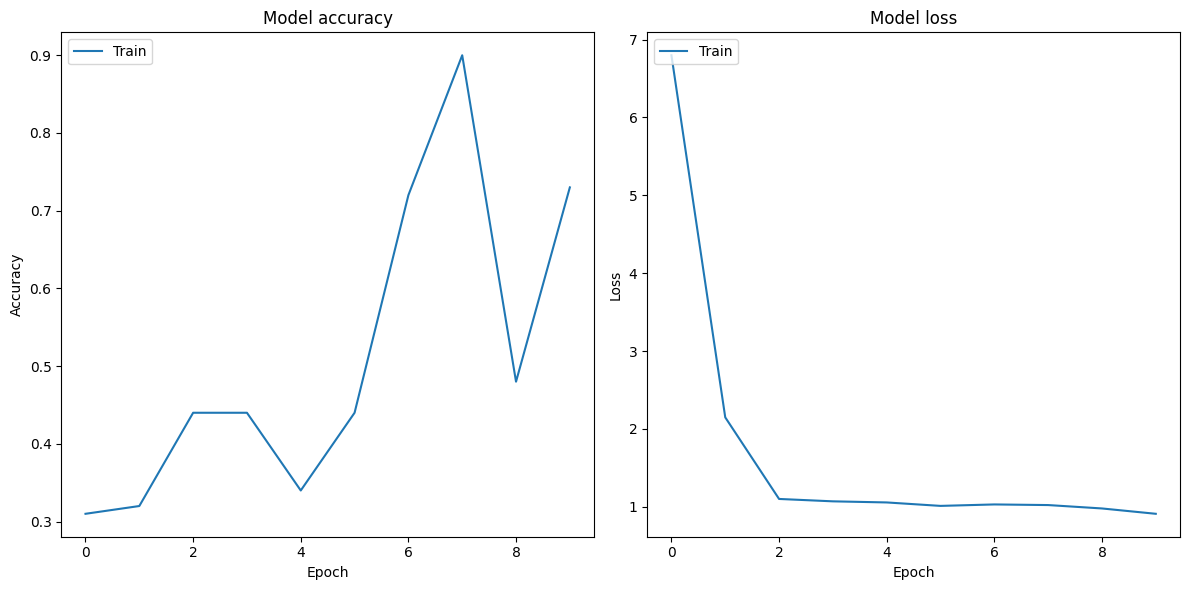

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
# If you had validation data and it was passed to model.fit, you would plot it here as well
# plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
# If you had validation data, you would plot it here as well
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.tight_layout()
plt.show()